In [2]:
import json
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

In [4]:
list_of_files = glob.glob('../data/*') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)

In [5]:
list_of_files = sorted(glob.glob('../data/exp1/*OPxo.json'))
# print(list_of_files)

numFiles = len(list_of_files)
xAxis = np.zeros(numFiles)
yValues = np.zeros(numFiles)

i = 0
for file in list_of_files:
    with open(file) as json_file:
        data = json.load(json_file)
        print(data['problemSize'])
        xAxis[i] = data['problemSize']
        yValues[i] = data['timeTaken']
        i = i + 1

print(yValues)

32
64
128
256
512
[2.3000e+01 7.8000e+01 3.5100e+02 1.4164e+04 6.0082e+04]


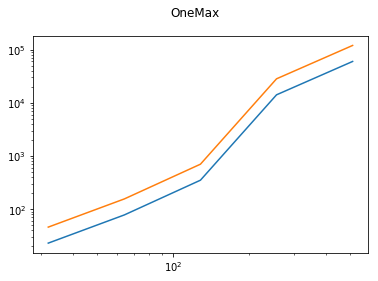

In [11]:
fig = plt.figure()  # an empty figure with no axes
fig.suptitle('OneMax')  # Add a title so we know which it is
plt.plot(xAxis, yValues, label='OnePoint')
plt.plot(xAxis, 2 * yValues, label='univariate')
plt.xscale("log")
plt.yscale("log")

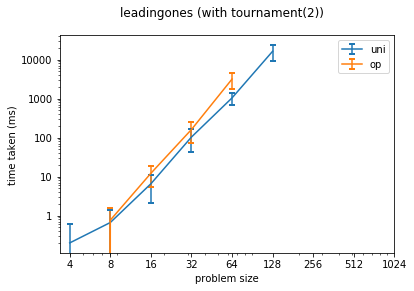

In [50]:
tournamentsize = 2
# problem = 'onemax'
problem = 'leadingones'

filename = "../data/exp1/" + str(problem) + "_tour" + str(tournamentsize) + ".json"
with open(filename) as json_file:
    data = json.load(json_file)
    
    fig = plt.figure()
    fig.suptitle(str(problem) + " (with tournament(" + str(tournamentsize) + "))")
    
    for var in {'op', 'uni'}:
        data2 = data['sel=tour' + str(tournamentsize)]['var=' + var]
        numEntries = len(data2)
        avgTimes = np.zeros(numEntries)
        stdTimes = np.zeros(numEntries)
        problemSizes = np.zeros(numEntries)

        for i, problemsize in enumerate(sorted(map(int, data2))):

            problemSizes[i] = problemsize

            repetitions = data2[str(problemsize)]
            times = np.empty(30)
            for j, rep in enumerate(repetitions):
                time = repetitions[rep]['timeTaken']
                times[j] = time

            avgTimes[i] = np.mean(times)
            stdTimes[i] = np.std(times)

        plt.errorbar(problemSizes, avgTimes, yerr=stdTimes, 
                     capsize=3, capthick=2, label=var)
    
    plt.legend()
    plt.xlabel('problem size')
    plt.ylabel('time taken (ms)')
    plt.xscale('log')
    plt.yscale('log')
    
    y = np.array([1,10,100,1000,10000])
    x = np.array([4,8,16,32,64,128,256,512,1024])
    plt.yticks(y, y)
    plt.xticks(x, x)

In [ ]:
#         for item in thing:
#             print(thing[item])
#         print(sorted(thing))
#         arr = map(lambda x : {
#             thing[x]['timeTaken']
#         }, thing)